# Load  Data  Sets  &  See  What's  Inside

We were given several data sets to work with, so let's load them up here, and explore some of their properties. We make sure to import the libraries that we will use throughout this initial data exploration.

In [793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set(style="whitegrid")
%matplotlib inline

Next, we will load the data sets into different data frames using pandas.

In [794]:
bom_df = pd.read_csv('Data/bom.movie_gross.csv')
imdb_name_df = pd.read_csv('Data/imdb.name.basics.csv')
imdb_akas_df = pd.read_csv('Data/imdb.title.akas.csv')
imdb_basics_df = pd.read_csv('Data/imdb.title.basics.csv')
imbd_crew_df = pd.read_csv('Data/imdb.title.crew.csv')
imdb_principals_df = pd.read_csv('Data/imdb.title.principals.csv')
imdb_ratings_df = pd.read_csv('Data/imdb.title.ratings.csv')
rt_info_df = pd.read_csv('Data/rt.movie_info.tsv', sep = '\t')
rt_reviews_df = pd.read_csv('Data/rt.reviews.tsv', sep = '\t', encoding ='ISO-8859-1')
tmdb_movies_df = pd.read_csv('Data/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv')
tmdb_data = pd.read_csv('Data/tmdb_movies_data.csv')

Now, we will use the .head() method and a few others to see what's going on in these files. After exploring each file, we will summarize what we have found, giving a clear summary of what the data set is and what features it contains.

In [795]:
#bom_df.head()
#imdb_name_df.head() 
#imdb_akas_df.head() 
#imdb_basics_df.head() 
#imbd_crew_df.head() 
#imdb_principals_df.head() 
#imdb_ratings_df.head() 
#rt_info_df.head() 
#rt_reviews_df.head()
#tmdb_movies_df.head()
#tn_budgets_df.head() 

**bom_df**: title, studio, domestic gross earnings, foreign gross earnings, year

**imdb_name_df**: This data frame shows us a bunch of peoples' names in the industry and their professions. Films are identified by an 'nconst'. 

**imdb_akas_df**: I believe this displays titles of films in different languages. Probably not that useful in our analyses.

**imdb_basics_df**: Gives us titles, start years, runtime minutes, and genres (I believe tv and films both)

**imbd_crew_df**: Using 'tconst' to identify the work, gives us the directors and writers coded as nm (maybe refers back to the imdb_names info?

**imdb_principals_df**: Ordering(??), nconst, category (i.e. actor, producer, etc.), job, characters

**imdb_ratings_df**: Average rating and number of votes with IDs being tconst again

**rt_info_df**: Tons of juicy info! Synopsis, Rating (G,R,etc.), genre, director, writer, theater date, dvd date, box office, runtime, studio

**tmdb_movies_df**: genre, original language, original title, popularity, release_date, title, vote_average, vote_count

**tn_budgets_df**: Nice and clean data. Movie title, release date, production budget, domestic gross, wordwide gross

# Looking at production budget, gross revenue, profit

In [796]:
tn_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [797]:
tn_budgets_df.head() #worldwide gross is not international gross 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



need to convert objects to int64 type

In [798]:
tn_budgets_df[tn_budgets_df.columns[3:]].replace('[\$,]', '', regex=True).astype('int64')
tn_budgets_df = tn_budgets_df.iloc[:,0:3]
tn_budgets_df = tn_budgets_df.join(tn_budgets_df2).drop(columns = ['id'])

In [799]:
tn_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [800]:
tn_budgets_df['difference'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']
tn_budgets_df['return_percent'] = (tn_budgets_df['difference'])/tn_budgets_df['production_budget']*100
tn_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,return_percent
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [801]:
x_variables = tn_budgets_df['difference']/1000000

Text(0,0.5,'count')

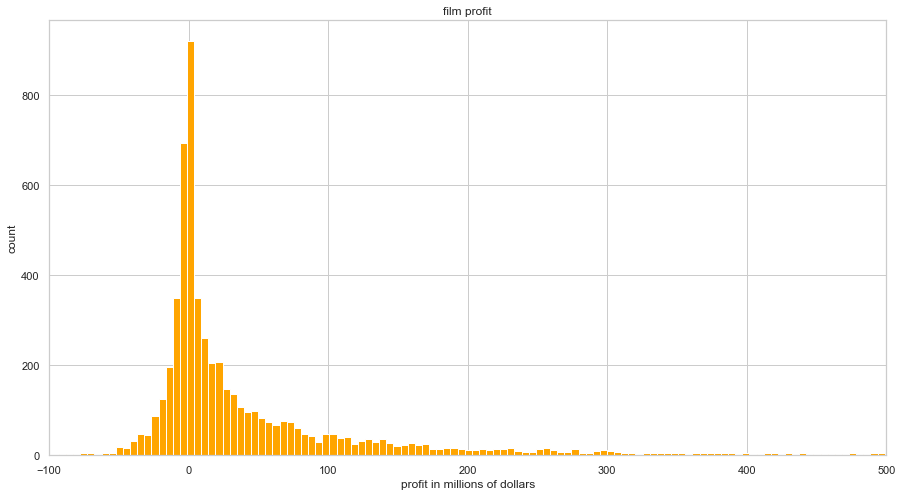

In [802]:
plt.figure(figsize = (15,8))
plt.hist(x_variables, color = 'orange', bins = 500)
plt.xlim(-100, 500)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title('film profit')
plt.xlabel('profit in millions of dollars')
plt.ylabel('count')


In [803]:
with open ('my_pickles/movie_budgets.p', 'wb') as writefile: 
    pickle.dump(tn_budgets_df, writefile)

## This was just playing with visualizations, don't worry about the stuff commented out below

In [804]:
# to_plot = tn_budgets_df.sort_values(by = ['difference'])
# to_plot.reset_index(inplace = True)
# to_plot.drop(columns = ['index'], inplace = True)
# to_plot.head()


# Don't worry about this 

In [805]:
# plt.figure(figsize = (15,10))
# sns.scatterplot(x = to_plot.index, y = 'difference', data = to_plot, color = 'orange')



In [806]:
# to_plot2 = tn_budgets_df.sort_values(by = ['return_percent'])
# to_plot2.reset_index(inplace = True)
# to_plot2.drop(columns = ['index'], inplace = True)
# to_plot2.head()

In [807]:
# plt.figure(figsize = (15,10))
# sns.scatterplot(x = to_plot2.index, y = 'return_percent', data = to_plot2, color = 'orange')
# plt.ylim(-100,10000)



In [808]:
# plt.figure(figsize = (12,6))
# sns.violinplot(n, color = 'violet')
# plt.xlim(-300,800)

In [809]:
# tn_budgets_df.sort_values(by = ['production_budget'], inplace = True)

In [810]:
# tot_gross = tn_budgets_df['total_gross']/1000000
# tot_budg = tn_budgets_df['production_budget']/1000000

In [811]:
# plt.figure(figsize = (15,8))
# plt.scatter(tot_gross, tot_budg, color = 'pink')
# plt.xlim(100, 1000)
# plt.ylim(0,100)
# plt.tick_params(axis='x')
# plt.tick_params(axis='y')
# plt.title('budget vs revenue')
# plt.xlabel('production budget in millions of dollars')
# plt.ylabel('gross earnings in millions of dollars')


In [812]:
# sns.lmplot('production_budget', 'total_gross', data =  tn_budgets_df, size = 10)
# plt.xlim(0,200000000)

# Now to clean!

#### We want to use IMDB data, but it's ugly and features are scattered in many data frames. We want to create a data frame that has all of IMDB's title ids point to the actual name of the films

In [813]:
# imdb_akas_df = imdb_akas_df[imdb_akas_df['is_original_title'] == 1]
# imdb_title_ids = imdb_akas_df[['title_id','title']].reset_index().drop(columns = ['index'])#.set_index('title_id')
# imdb_title_ids.head()
# #imdb_title_ids[imdb_title_ids['title'] == 'Avatar']
# #Google how to hide errors
# Ignore this part for now

In [814]:
#imdb_basics_df[imdb_basics_df['primary_title'].str.contains('Titanic')]

In [815]:
imdb_basics_df['genres'] = imdb_basics_df['genres'].apply(lambda x: str(x).split(','))
imdb_basics_df.drop(columns = ['start_year', 'runtime_minutes', 'original_title'], inplace = True)
imdb_basics_df.head()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,[Drama]
3,tt0069204,Sabse Bada Sukh,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,"[Comedy, Drama, Fantasy]"


In [816]:
imdb_basics_df[imdb_basics_df['primary_title'] == 'Avatar']

,tconst,primary_title,genres
17060,tt1775309,Avatar,[Horror]


#### Now let's append some actors, writers, directors, and budgets here

##### **first people:**

In [817]:
imdb_name_df['primary_profession'] = imdb_name_df['primary_profession'].apply(lambda x: str(x).split(','))
#actors = imdb_name_df[imdb_name_df['primary_profession'].apply(lambda x: ('actor' in x) or ('actress' in x))]
people = imdb_name_df.drop(columns = ['birth_year', 'death_year', 'primary_profession', 'known_for_titles'])
people.head(10)

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
5,nm0062879,Ruel S. Bayani
6,nm0063198,Bayou
7,nm0063432,Stevie Be-Zet
8,nm0063618,Jeff Beal
9,nm0063750,Lindsay Beamish


##### **next the categories for each movie:**

In [818]:
imdb_principals_df.drop(columns = ['ordering', 'job'], inplace = True)
imdb_principals_df.head(10)

,tconst,nconst,category,characters
0,tt0111414,nm0246005,actor,"[""The Man""]"
1,tt0111414,nm0398271,director,NaN
2,tt0111414,nm3739909,producer,NaN
3,tt0323808,nm0059247,editor,NaN
4,tt0323808,nm3579312,actress,"[""Beth Boothby""]"
5,tt0323808,nm2694680,actor,"[""Steve Thomson""]"
6,tt0323808,nm0574615,actor,"[""Sir Lachlan Morrison""]"
7,tt0323808,nm0502652,actress,"[""Lady Delia Morrison""]"
8,tt0323808,nm0362736,director,NaN
9,tt0323808,nm0811056,producer,NaN


# TMDB data

In [819]:
tmdb_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [820]:
tmdb_data.drop(columns = ['id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 
                         'release_date'], inplace = True)

In [821]:
tmdb_data['cast'] = tmdb_data['cast'].apply(lambda x: str(x).split('|'))
tmdb_data['genres'] = tmdb_data['genres'].apply(lambda x: str(x).split('|'))
tmdb_data['budget'] = tmdb_data['budget']/1000000
tmdb_data['revenue'] = tmdb_data['revenue']/1000000

#tmdb_data.head()


In [847]:
tmdb_cleaned = tmdb_data.sort_values(by = ['revenue_adj'], ascending = False)

In [848]:
tmdb_cleaned = tmdb_cleaned[~tmdb_cleaned.director.isna()]

In [849]:
tmdb_cleaned.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,tt0499549,9.432768,0.000237,2781.505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[Action, Adventure, Fantasy, Science Fiction]",8458,7.1,2009,2.408869e+08,2.827124e+09
1329,tt0076759,12.037933,0.000011,775.398007,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",George Lucas,"[Adventure, Action, Science Fiction]",4428,7.9,1977,3.957559e+07,2.789712e+09
5231,tt0120338,4.355219,0.000200,1845.034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",James Cameron,"[Drama, Romance, Thriller]",4654,7.3,1997,2.716921e+08,2.506406e+09
10594,tt0070047,2.010733,0.000008,441.306145,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",William Friedkin,"[Drama, Horror, Thriller]",1113,7.2,1973,3.928928e+07,2.167325e+09
9806,tt0073195,2.563191,0.000007,470.654000,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",Steven Spielberg,"[Horror, Thriller, Adventure]",1415,7.3,1975,2.836275e+07,1.907006e+09


# End TMBD Data

##### **next budgets:**

In [823]:
tn_budgets_df.sort_values(by = ['worldwide_gross'], ascending = False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,return_percent
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
66,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,699.327786
26,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,574.638176
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,574.129112
260,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,973.354526


##### **Great! Now we should combine all data frames to get our final one to work with :)**

In [824]:
# merged1 = imdb_principals_df.merge(people, left_on = 'nconst', right_on = 'nconst', how ='inner')
# merged1.head(10)

In [825]:
# merged2 = merged1.merge(imdb_basics_df, left_on = 'tconst', right_on = 'tconst', how ='inner')
# merged2.head(10)

In [826]:
# merged2[merged2['tconst'] == 'tt1630029']

In [827]:
# merged2[merged2['primary_title'] == 'Avatar']

In [828]:
# merged3 = merged2.merge(tn_budgets_df, left_on = 'primary_title', right_on = 'movie', how ='inner')
# merged3.head()

In [829]:
#cleaned_data = merged3.sort_values(by = ['worldwide_gross'], ascending = False)

In [830]:
#cleaned_data.drop(columns = ['tconst', 'nconst', 'primary_title'], inplace = True)

In [831]:
#cleaned_data.head(20)

# looking at genres

#### which genres make the most money consistently

# Box Office by Director

In [832]:
#return a data frame only with box_office counts
rt_info_cleaned = rt_info_df[~rt_info_df['box_office'].isna()]
#make sure box_office are integers
rt_info_cleaned['box_office'] = rt_info_cleaned.box_office.replace(',','', regex=True)
rt_info_cleaned['box_office'] = rt_info_cleaned.box_office.astype('int64')
#rt_info_cleaned.dtypes

/Users/sebastianmonzon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sebastianmonzon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [833]:
directors = rt_info_cleaned.groupby('director')

In [834]:
directors = directors['box_office'].mean().sort_values(ascending = False)

In [835]:
directors = directors.head(10)

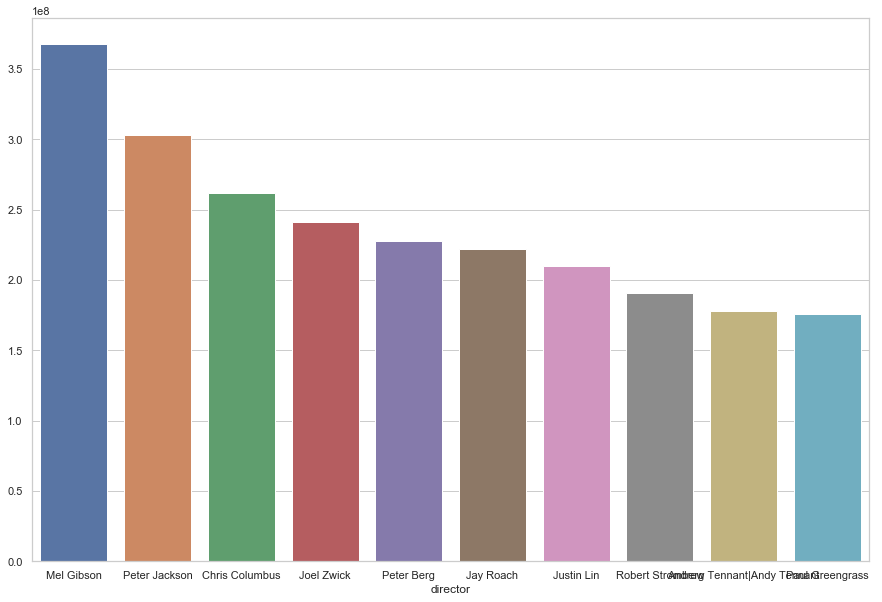

In [836]:
plt.figure(figsize = (15,10))
sns.barplot(x = directors.index, y = directors.values)

Let's say we want a comedy though... who are the top ten directors then?

In [837]:
directors_comedy = rt_info_cleaned[rt_info_cleaned['genre'] == 'Comedy'].groupby('director')

In [838]:
directors_comedy = directors_comedy['box_office'].mean().sort_values(ascending = False)

In [839]:
directors_comedy = directors_comedy.head(10)

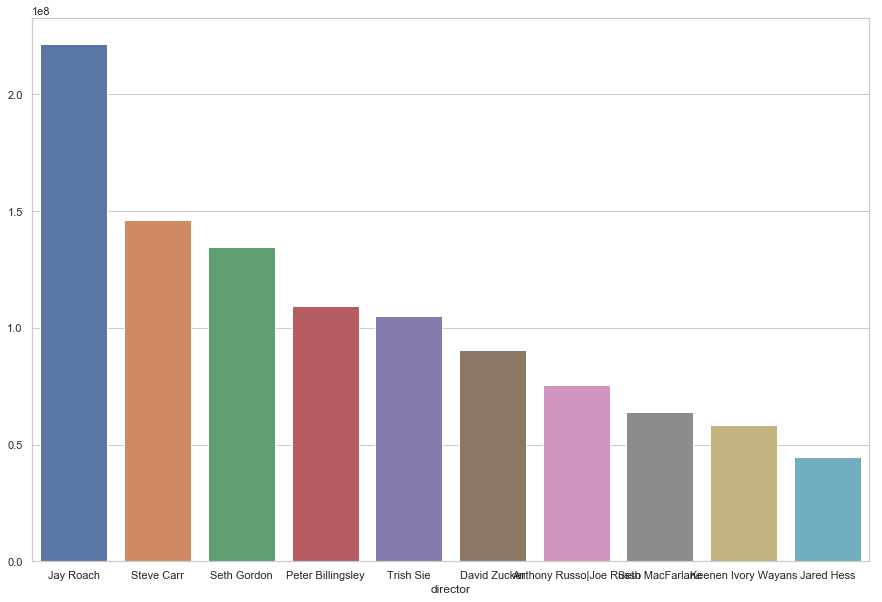

In [840]:
plt.figure(figsize = (15,10))
sns.barplot(x = directors_comedy.index, y = directors_comedy.values)

we could also go and find the standard deviation of everything